In [6]:
#!/usr/bin/env python
"""
Example classifier on Numerai data using a logistic regression classifier.
To get started, install the required packages: pip install pandas, numpy, sklearn
"""

import pandas as pd
import numpy as np
from sklearn import metrics, preprocessing, linear_model, ensemble, preprocessing, cluster, decomposition
import xgboost as xgb
import lightgbm as lgb
from sklearn.manifold import TSNE
train = pd.read_csv('trainData.csv', header=0)
test = pd.read_csv('testData.csv', header=0)
validation = train.iloc[:8000]
train = train.iloc[8000:]
features = [f for f in list(train) if "v" in f]
train = train.sample(frac = 0.9)
validation = validation.sample(frac = 0.5)
X = train[features]
Y = train['target']
x_prediction = validation[features]

print("Launching")

def logloss(target, predictions):
        total=0
        for i, tar in enumerate(target):
            total+=np.log(predictions[i][tar-1]+1e-7)
        return total*-1/float(target.shape[0])
def main():
    # Set seed for reproducibility
    np.random.seed(0)

    print("# Loading data...")
    # The training data is used to train your model how to predict the targets.
    train = pd.read_csv('trainData.csv', header=0) #61878 training data
    # The tournament data is the data that Numerai uses to evaluate your model.
    test = pd.read_csv('testData.csv', header=0)

    # The tournament data contains validation data, test data and live data.
    # Validation is used to test your model locally so we separate that.
    validation = train.iloc[60000:]
    train = train.iloc[:60000]
   

    # Transform the loaded CSV data into numpy arrays
    features = [f for f in list(train) if "v" in f]
    X = train[features]
    X+=np.random.rand(X.shape[0],X.shape[1])*1e-4-np.random.rand(X.shape[0],X.shape[1])*1e-4
    Y = train['target']
    x_prediction = validation[features]

    # This is your model that will learn to predict this target.
    
    model_linear = xgb.XGBClassifier(max_depth=20, learning_rate=0.1, n_estimators=100)
    model_ensemble = ensemble.RandomForestClassifier(n_estimators=100, max_depth=49, random_state=0)
    print("# Training...")
    # Your model is trained on train_bernie
    model_linear.fit(X, Y)
    model_ensemble.fit(X, Y)

    print("# Predicting...")
    # Based on the model we can predict the probability of each row being
    # a bernie_target in the validation data.
    # The model returns two columns: [probability of 0, probability of 1]
    # We are just interested in the probability that the target is 1.
    y_prediction_ensemble = model_ensemble.predict_proba(x_prediction)
    print("- probabilities_ensemble:", y_prediction_ensemble[:5])
    y_prediction_linear = model_linear.predict_proba(x_prediction)
    
    print("- probabilities_linear:", y_prediction_linear[:5])
    

    # We can see the probability does seem to be good at predicting the
    # true target correctly.
    print("- target:", validation['target'][:5])
    y_prediction = [
        x if max(x) > max(y) else y for (x, y) in zip(y_prediction_linear, y_prediction_ensemble)
    ]
    # But overall the accuracy is very low.
    correct = [
        x[y-1] == max(x) for (x, y) in zip(y_prediction, validation['target'] )
    ]
    print("- accuracy: ", sum(correct) / float(validation.shape[0]))
    # Numerai measures models on logloss instead of accuracy. The lower the logloss the better.
    # Numerai only pays models with logloss < 0.693 on the live portion of the tournament data.
    # Our validation logloss isn't very good.
    print("- validation logloss:",
          logloss(validation['target'], y_prediction))
    """
    T = test[features]
    test_prediction = model.predict_proba(T)
    test_df_probabilities=pd.DataFrame(test_prediction, columns=['c1','c2','c3','c4','c5','c6','c7','c8','c9'])
    test_df_probabilities.to_csv('baseline_model_probabilities.csv', index=False)
    test_classes=[np.argmax(t) for t in test_prediction]
    test_result=np.zeros((len(test_classes), 9))
    for i in range(len(test_result)):
        test_result[i][test_classes[i]] = 1
    test_df_binary=pd.DataFrame(test_result, columns=['c1','c2','c3','c4','c5','c6','c7','c8','c9'])
    test_df_binary.to_csv('baseline_model_binary.csv', index=False)
    """
    
    """
    # To submit predictions from your model to Numerai, predict on the entire tournament data.
    x_prediction = tournament[features]
    y_prediction = model.predict_proba(x_prediction)
    results = y_prediction[:, 1]

    print("# Creating submission...")
    # Create your submission
    results_df = pd.DataFrame(data={'probability': results})
    joined = pd.DataFrame(ids).join(results_df)
    print("- joined:", joined.head())

    print("# Writing predictions to bernie_submissions.csv...")
    # Save the predictions out to a CSV file.
    joined.to_csv("bernie_submission.csv", index=False)
    # Now you can upload these predictions on https://numer.ai
    """ 

"""
TIPS TO IMPROVE YOUR MODEL

1. Use eras
In this example, we dropped era column but you can use the era column to improve peformance across eras
You can take a model like the above and use it to generate probabilities on the training data, and
look at the the eras where your model was <0.693 and then build a new model on those bad eras to
combine with your main model. In this way, you may be hedged to the risk of bad eras in the future.
Advanced tip: To take this further, you could add the objective of doing consistenty well across all eras
directly into the objective function of your machine learning model.

2. Use feature importance
As per above, you don't want your model to rely too much on any particular type of era. Similarly, you
don't want your model to rely too much on any particular type of feature. If your model relies heavily on
one feature (in linear regression, some feature has very high coefficient), then if that feature doesn't work
in a particular era then your model will perform poorly. If your model balances its use of features then it is
more likely to be consistent across eras.

3. Use all the targets
As we saw above, a model trained on one target like target_bernie might be good at predicting another target
like target_elizabeth. Blending models built on each target could also improve your logloss and consistency.
"""
    
            
#if __name__ == '__main__':
    #main()


Launching


"\nTIPS TO IMPROVE YOUR MODEL\n\n1. Use eras\nIn this example, we dropped era column but you can use the era column to improve peformance across eras\nYou can take a model like the above and use it to generate probabilities on the training data, and\nlook at the the eras where your model was <0.693 and then build a new model on those bad eras to\ncombine with your main model. In this way, you may be hedged to the risk of bad eras in the future.\nAdvanced tip: To take this further, you could add the objective of doing consistenty well across all eras\ndirectly into the objective function of your machine learning model.\n\n2. Use feature importance\nAs per above, you don't want your model to rely too much on any particular type of era. Similarly, you\ndon't want your model to rely too much on any particular type of feature. If your model relies heavily on\none feature (in linear regression, some feature has very high coefficient), then if that feature doesn't work\nin a particular era th

In [81]:
X_embedded = decomposition.PCA(n_components=1).fit_transform(X)
print(X_embedded.shape)


(12000, 3)


In [82]:
valid_embedded = decomposition.PCA(n_components=1).fit_transform(x_prediction)#validation[["v1", "v100"]]
print(valid_embedded.shape)

(1878, 3)


In [71]:
#import matplotlib.pyplot as plt
#plt.plot(X_embedded[:,0], X_embedded[:,1])
#print(X_embedded[:,0].shape)
train['addedColumn3']=preprocessing.normalize(X_embedded)[:,2]
#train['addedColumn3']=preprocessing.normalize(X_embedded)[:,1]
validation['addedColumn3']=preprocessing.normalize(valid_embedded)[:,2]
#validation['addedColumn3']=preprocessing.normalize(valid_embedded)[:,1]

In [75]:
kmeans = cluster.KMeans(n_clusters=9, random_state=0).fit(X)
kMeanFeature=kmeans.labels_

kmeans_valid = cluster.KMeans(n_clusters=9, random_state=0).fit(x_prediction)
kMeanFeature_valid=kmeans_valid.labels_
#kmeans.predict(X) this is to predict the new results but we won't need that because we use classification

In [76]:
mi=min(valid_embedded)
ma=max(valid_embedded)

v_e=[(x-mi)/(ma-mi) for x in valid_embedded]
print(v_e[:10])

mi=min(X_embedded)
ma=max(X_embedded)

x_e=[(x-mi)/(ma-mi) for x in X_embedded]
print(x_e)


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [179]:
print(validation['target'][:10])
print(kMeanFeature_valid[:10])

60000    5
60001    5
60002    8
60003    6
60004    1
60005    2
60006    6
60007    6
60008    2
60009    8
Name: target, dtype: int64
[5 5 7 5 7 3 0 1 5 5]


In [77]:
train['addedColumn3']=kMeanFeature/9.0
validation['addedColumn3']=kMeanFeature_valid/9.0

In [9]:
train['addedColumn3']=x_e[:]
validation['addedColumn3']=v_e[:]

In [44]:
train.head()
train.corr()


,v1,v10,v100,v101,v102,v103,v11,v12,v13,v14,...,v92,v93,v94,v95,v96,v97,v98,v99,target,addedColumn2
v1,1.000000,-0.006239,-0.001639,0.000512,0.090458,0.049507,-0.019710,-0.006802,-0.003949,0.052077,...,0.072960,-0.014801,0.745589,0.113371,0.055539,-0.021234,0.036214,0.006405,0.151795,0.871736
v10,-0.006239,1.000000,0.017619,0.008363,0.030552,-0.013748,-0.030755,0.001840,0.003348,0.123645,...,0.024369,0.013889,0.001809,0.022232,0.025577,0.364491,0.086815,0.010114,0.022419,-0.000689
v100,-0.001639,0.017619,1.000000,0.224500,0.119364,0.023487,-0.025480,0.015558,0.160588,0.207866,...,0.051083,0.061320,0.057012,0.204650,0.073187,-0.005374,0.231281,0.067806,0.147083,0.041388
v101,0.000512,0.008363,0.224500,1.000000,0.159804,0.048076,-0.127855,0.028658,0.368415,0.167661,...,-0.061125,0.178416,0.130444,0.585067,0.205298,-0.082586,0.303343,0.213979,0.254470,0.096075
v102,0.090458,0.030552,0.119364,0.159804,1.000000,-0.015557,-0.061850,-0.006478,0.035934,0.207062,...,0.062823,0.031614,0.195280,0.136687,0.144296,-0.039799,0.171541,0.220836,0.177385,0.172847


In [73]:
v99_unique_sorted=np.sort(train.v99.unique())
print(v99_unique_sorted)
print(np.diff(v99_unique_sorted))


[ 0.   0.2  0.4  0.6  0.8  1.   1.2  1.4  1.6  1.8  2.   2.2  2.4  2.6
  2.8  3.   3.2  3.4  3.6  3.8  4.   4.2  4.4  4.8  5.   5.2  5.4  5.6
  6.   6.8  7.2  7.6  8.2  8.4  8.8 10.8 13.6 17.2]
[0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2
 0.2 0.2 0.2 0.2 0.4 0.2 0.2 0.2 0.2 0.4 0.8 0.4 0.4 0.6 0.2 0.4 2.  2.8
 3.6]


In [78]:
print((train.v99/0.2).head(20))
(train.v99/0.2).value_counts()

59130    1.0
40374    0.0
54446    0.0
24082    0.0
56853    0.0
4        0.0
26327    0.0
43056    1.0
19598    0.0
13631    0.0
8227     4.0
15189    0.0
19015    0.0
50486    0.0
7621     0.0
4241     0.0
4356     0.0
6871     1.0
41464    3.0
14399    0.0
Name: v99, dtype: float64


0.0     7958
1.0     1722
2.0      638
3.0      333
4.0      237
12.0     176
5.0      142
8.0      131
6.0       95
13.0      81
9.0       77
10.0      75
7.0       72
11.0      49
14.0      48
16.0      40
17.0      23
15.0      22
18.0      21
19.0      12
20.0       9
21.0       8
22.0       6
24.0       6
26.0       4
25.0       3
68.0       1
54.0       1
38.0       1
86.0       1
30.0       1
34.0       1
36.0       1
44.0       1
27.0       1
42.0       1
28.0       1
41.0       1
Name: v99, dtype: int64

In [13]:
#### train.corr()
#train.drop(columns=['v48'])
#validation.drop(columns=['v48'])
#train['addedColumn']=train.v94*train.v1
#validation['addedColumn']=validation.v94*validation.v1
featDict={}
model = ensemble.RandomForestClassifier(n_estimators=100, max_depth=49, random_state=0)
for i in range(91,103):
    if "v" + str(i) in list(train):
        print('---------', str(i), '----------')
        featDict[i]=[]
        for j in range(i,103):
            if "v" + str(j) in list(train):
                train['addedColumn2']=train["v" + str(i)]*train["v" + str(j)]
                validation['addedColumn2']=validation["v" + str(i)]*validation["v" + str(j)]
                features = [f for f in list(train) if "v" in f or 'addedColumn' in f]
                X = train[features]
                Y = train['target']
                x_prediction = validation[features]
                model.fit(X, Y)
                y_prediction_lgb = model.predict_proba(x_prediction)
                score=logloss(validation['target'], y_prediction_lgb)
                print(score)
                if(score<0.62):
                    print(j)
                    featDict[i].append(j)
        
    
    
#train['addedColumn3']=train.v53*train.v99*train.v49
#validation['addedColumn3']=validation.v53*validation.v99*validation.v49
#train['addedColumn5']=train.v30*train.v11
#validation['addedColumn5']=validation.v30*validation.v11
#train['addedColumn']=train.v1+train.v94
#validation['addedColumn']=validation.v1+validation.v94


features = [f for f in list(train) if "v" in f or 'addedColumn' in f]
stdDict={}
for item in features:
    stdDict[item]=train[item].std()

sortedStdDict=sorted(stdDict.items(), key=lambda x: x[1], reverse=False)


#features.remove('v48')
#features.remove('v69')
featDict
print(featDict)


print("end")

{30: [32, 36,51,81,88,99], 31: [40,64,82,88], 32: [50,66,89,97], 33: [45, 49,51,55,57,76,93],
34: [34,51,57,60,77,81,86], 35: [38,42,70,89,97], 37: [85], 38: [56,67,91,94], 39: [46,64,67],
40: [45,53,64,76,96] 
}

"""



--------- 39 ----------

46

64

67

--------- 40 ----------

45

53

64

76

96


"""

--------- 91 ----------
0.6261197937590031
0.6295114316585096
0.6251235769222229
0.6272956717752961
0.629565343911002
0.6232851615293156
0.6222260359166633
0.6250220603544154
0.6245009048080297
0.6261723530154557
0.6331810024110142
0.6311342556881925
--------- 92 ----------
0.6297663278772498
0.6299056471371814
0.6286459736933251
0.6319769388759786
0.6247394001480306
0.6290772101679727
0.6272154217446474
0.6305907422655865
0.6285989572027828
0.6255233395037471
0.6207121952987044
--------- 93 ----------
0.62715528106476
0.6256007525340952
0.6289930955593885
0.6206825244008696
0.6251825859947792
0.6271869154477823
0.6305829166621567
0.6287806961173157
0.627973292188552
0.6281104013304147
--------- 94 ----------
0.6297374453630481
0.62182040121183
0.6248305992899134
0.6271201634287831
0.6312791884689508
0.6244321296956218
0.6320522980745267
0.6254731691515505
0.6247774446782242
--------- 95 ----------
0.6261955314177039
0.6249863502924514
0.6321736379941268
0.6275671008757004
0.6316460598

'\n--------- 30 ----------\n0.6247449049049987\n0.6243055512782819\n0.6166656981264553\n32\n0.619259744416463\n0.6171325096925185\n0.6240310581357293\n0.6169762995304915\n36\n0.6193106521259483\n0.6183126942781685\n0.6216304490385155\n0.6251908245403978\n0.6196500171307467\n0.6238120832858998\n0.6276470326143964\n0.6221853276176016\n0.6254897238699522\n0.6192791065417271\n0.6200798671058565\n0.6258871026507725\n0.6232383225254688\n0.6230124229888883\n0.6157003810483627\n51\n0.6273736855456948\n0.6216909580390046\n0.6254391434021702\n0.6243933305151467\n0.6194437918918869\n0.6221190390269551\n0.6206317798102176\n0.6248611819864839\n0.6186142661894543\n0.6217478798779328\n0.6205919110339463\n0.6182698341483116\n0.6248588257374558\n0.6217682039264791\n0.6247162684156916\n0.6248951894059518\n0.6191927412230828\n0.6200455030339779\n0.6219947994283931\n0.6181640691280631\n0.6238900095736637\n0.6190919758017199\n0.62397815645406\n0.6193209471527139\n0.6208242511335981\n0.6203880443230139\n0.6

In [14]:
print(featDict)


{91: [], 92: [], 93: [], 94: [], 95: [], 96: [], 97: [], 98: [], 99: [], 100: [], 101: [], 102: []}


{4: [4, 5, 6, 7, 8, 10, 12, 13, 15, 19, 20, 21, 23, 24, 25, 27, 31, 33, 34, 35, 36, 37, 38, 40, 43, 45, 46, 48, 52, 53, 55, 56, 57, 59, 62, 65, 66, 67, 68, 70, 72, 73, 75, 76, 78, 82, 83, 84, 85, 86, 91, 92, 93, 99, 100], 5: [1, 2, 4, 5, 7, 10, 12, 13, 17, 18, 19, 21, 22, 24, 25, 26, 27, 31, 34, 35, 36, 37, 40, 41, 43, 45, 46, 48, 53, 55, 57, 59, 60, 61, 62, 65, 66, 67, 70, 71, 73, 74, 76, 78, 79, 80, 81, 82, 83, 87, 89, 92, 94, 95, 96, 98, 100, 101], 6: [4, 6, 8, 9, 10, 11, 12, 13, 17, 18, 20, 22, 23, 27, 29, 30, 31, 32, 33, 34, 35, 37, 42, 53, 54, 55, 57, 59, 60, 62, 63, 64, 66, 72, 73, 74, 75, 76, 77, 78, 79, 86, 87, 90, 91, 96, 97, 102], 7: [1, 2, 4, 5, 7, 9, 10, 11, 12, 14, 15, 16, 17, 20, 22, 23, 24, 26, 28, 34, 36, 38, 41, 42, 44, 45, 47, 48, 49, 50, 51, 53, 56, 62, 63, 64, 65, 67, 68, 71, 72, 78, 79, 80, 81, 83, 84, 85, 87, 88, 89, 91, 93, 94, 95, 97, 98, 100, 101, 102], 8: []}


{8: [5, 7, 8, 10, 11, 12, 13, 14, 17, 18, 20, 22, 24, 26, 29, 31, 32, 33, 38, 43, 49, 50, 51, 54, 55, 56, 57, 58, 60, 62, 63, 64, 67, 69, 75, 77, 79, 82, 87, 88, 90, 91, 93, 94, 96, 99, 100, 101], 9: [1, 2, 3, 4, 7, 9, 11, 19, 21, 25, 27, 28, 29, 30, 32, 34, 35, 45, 47, 49, 52, 54, 55, 57, 59, 60, 64, 67, 69, 71, 79, 81, 82, 84, 86, 88, 90, 92, 93, 94, 97], 10: [4, 5, 7, 8, 11, 28, 31, 33, 47, 53, 54, 86, 91, 94, 98], 11: [1, 8, 9, 10, 11, 13, 18, 22, 26, 28, 29, 51, 52, 53, 54, 55, 56, 65, 68, 69, 74, 75, 81, 83, 84, 85, 86, 90, 92, 93, 96, 99], 12: [1, 7, 8, 13, 16, 17, 18, 19, 20, 21, 24, 25, 26, 27, 29, 33, 39, 40, 44, 48, 52, 59, 61, 65, 66, 70, 74, 76, 79, 80, 81, 84, 85, 87, 89, 93, 94, 95, 96, 101], 13: [1, 3, 8, 11, 12, 17, 20, 23, 25, 26, 29, 30, 34, 36, 37, 41, 42, 46, 48, 53, 54, 55, 59, 64, 65, 67, 72, 73, 75, 81, 84, 85, 88, 90, 95, 99], 14: [8, 14, 16, 20, 24, 28, 34, 35, 37, 41, 42, 51, 52, 54, 55, 58, 60, 66, 71, 77, 83, 85, 87, 88, 91, 93, 95, 98], 15: [2, 7, 15, 17, 18, 26, 27, 28, 31, 34, 43, 50, 61, 73, 76, 79, 80, 90, 100], 16: [1, 3, 4, 5, 12, 14, 18, 32, 33, 45, 46, 49, 55, 58, 65, 66, 68, 72, 74, 76, 77, 79, 80, 81, 84, 85, 88, 91, 92, 97], 17: [4, 8, 12, 13, 15, 18, 20, 22, 29, 30, 33, 37, 41, 42, 43, 45, 49, 51, 55, 62, 65, 69, 70, 71, 73, 77, 82, 83, 84, 87, 88, 89, 91, 92, 93], 18: [2, 3, 5, 8, 11, 12, 15, 16, 17, 18, 19, 20, 21, 31, 33, 34, 36, 38, 39, 42, 46, 53, 57, 58, 62, 71, 76, 79, 84, 87, 88, 93, 95, 99, 100], 19: [1, 2, 3, 9, 12, 18, 20, 22, 24, 26, 27, 29, 35, 36, 47, 48, 50, 54, 56, 61, 63, 65, 67, 70, 71, 77, 78, 80, 81, 84, 85, 88, 94, 96, 97, 100, 101], 20: [1, 2, 4, 5, 7, 8, 12, 13, 14, 17, 18, 19, 23, 28, 30, 32, 33, 38, 40, 45, 46, 49, 50, 52, 53, 54, 55, 56, 57, 65, 66, 67, 72, 75, 77, 78, 81, 82, 87, 91, 92, 97, 102], 21: [1, 2, 9, 12, 18, 26, 29, 30, 37, 39, 40, 41, 42, 47, 49, 51, 53, 54, 55, 57, 60, 62, 63, 66, 69, 70, 78, 82, 83, 85, 87, 89, 93, 96, 97, 98, 99, 102], 22: [1, 5, 7, 8, 11, 17, 19, 22, 24, 26, 27, 28, 33, 34, 37, 46, 49, 53, 54, 57, 58, 60, 61, 63, 66, 70, 71, 75, 76, 77, 80, 82, 83, 90, 92, 96, 99, 100], 23: [7, 13, 20, 25, 28, 32, 33, 36, 39, 48, 53, 54, 56, 66, 67, 68, 71, 81, 85, 88, 95], 24: [1, 8, 12, 14, 19, 22, 25, 26, 30, 31, 32, 34, 38, 41, 45, 47, 48, 54, 67, 70, 74, 76, 89, 92, 99], 25: [9, 12, 13, 23, 24, 25, 26, 27, 29, 31, 34, 36, 39, 42, 43, 44, 45, 47, 48, 49, 52, 53, 54, 55, 56, 57, 59, 63, 75, 76, 77, 78, 79, 81, 82, 84, 86, 89, 90, 91, 95, 96, 97, 98, 99, 100, 101, 102], 26: [1, 4, 7, 8, 11, 12, 13, 15, 19, 21, 22, 24, 25, 31, 32, 33, 39, 42, 46, 50, 55, 59, 60, 62, 64, 70, 71, 73, 75, 79, 81, 82, 86, 88, 91, 93, 95, 96, 102], 27: [7, 9, 12, 15, 19, 22, 25, 29, 30, 31, 38, 40, 41, 46, 47, 50, 51, 53, 54, 55, 57, 61, 63, 64, 65, 67, 72, 80, 81, 83, 88, 91, 97, 98, 100, 102], 28: [4, 9, 10, 11, 14, 15, 20, 22, 23, 32, 40, 41, 53, 54, 56, 57, 60, 61, 62, 64, 65, 70, 74, 80, 81, 82, 83, 84, 85, 87, 93, 94, 97, 98], 29: [3, 8, 9, 11, 12, 13, 17, 19, 21, 25, 27, 30, 33, 34, 37, 41, 46, 47, 48, 50, 54, 57, 58, 60, 62, 65, 66, 67, 71, 74, 76, 78, 79, 81, 87, 88, 89, 90, 97, 98], 30: [1, 2, 9, 13]}

{41: [44, 55, 62, 72], 42: [66, 88, 97], 43: [50, 63, 71]}

{44: [45, 69], 45: [57, 63, 73, 80, 99], 46: [46, 50, 70, 74, 77, 95], 47: [85], 48: [49, 59, 61], 49: [49, 71, 82, 99], 50: [92], 51: [64, 97], 52: [80], 53: [87, 95], 54: [], 55: [101], 56: [], 57: [90], 58: [60, 70], 59: [70], 60: [83, 102], 61: [], 62: [], 63: [86], 64: [], 65: [94, 98, 101], 66: [], 67: [80, 85], 68: [], 69: [75], 70: [], 71: [78, 82, 86], 72: [], 73: [84, 91, 97, 98], 74: [79, 81], 75: [91, 101], 76: [99, 100], 77: [], 78: [100, 102], 79: []}

In [21]:
featDict = {1: [32], 3: [2,7,9,12,17,18,20,21,22,23,25,26,29,30,31,32,34,36,37,38,41,42,44,47],4: [4, 5, 6, 7, 8, 10, 12, 13, 15, 19, 20, 21, 23, 24, 25, 27, 31, 33, 34, 35, 36, 37, 38, 40, 43, 45, 46, 48, 52, 53, 55, 56, 57, 59, 62, 65, 66, 67, 68, 70, 72, 73, 75, 76, 78, 82, 83, 84, 85, 86, 91, 92, 93, 99, 100], 5: [1, 2, 4, 5, 7, 10, 12, 13, 17, 18, 19, 21, 22, 24, 25, 26, 27, 31, 34, 35, 36, 37, 40, 41, 43, 45, 46, 48, 53, 55, 57, 59, 60, 61, 62, 65, 66, 67, 70, 71, 73, 74, 76, 78, 79, 80, 81, 82, 83, 87, 89, 92, 94, 95, 96, 98, 100, 101], 6: [4, 6, 8, 9, 10, 11, 12, 13, 17, 18, 20, 22, 23, 27, 29, 30, 31, 32, 33, 34, 35, 37, 42, 53, 54, 55, 57, 59, 60, 62, 63, 64, 66, 72, 73, 74, 75, 76, 77, 78, 79, 86, 87, 90, 91, 96, 97, 102], 7: [1, 2, 4, 5, 7, 9, 10, 11, 12, 14, 15, 16, 17, 20, 22, 23, 24, 26, 28, 34, 36, 38, 41, 42, 44, 45, 47, 48, 49, 50, 51, 53, 56, 62, 63, 64, 65, 67, 68, 71, 72, 78, 79, 80, 81, 83, 84, 85, 87, 88, 89, 91, 93, 94, 95, 97, 98, 100, 101, 102],
            8: [5, 7, 8, 10, 11, 12, 13, 14, 17, 18, 20, 22, 24, 26, 29, 31, 32, 33, 38, 43, 49, 50, 51, 54, 55, 56, 57, 58, 60, 62, 63, 64, 67, 69, 75, 77, 79, 82, 87, 88, 90, 91, 93, 94, 96, 99, 100, 101], 9: [1, 2, 3, 4, 7, 9, 11, 19, 21, 25, 27, 28, 29, 30, 32, 34, 35, 45, 47, 49, 52, 54, 55, 57, 59, 60, 64, 67, 69, 71, 79, 81, 82, 84, 86, 88, 90, 92, 93, 94, 97],
            10: [4, 5, 7, 8, 11, 28, 31, 33, 47, 53, 54, 86, 91, 94, 98], 11: [1, 8, 9, 10, 11, 13, 18, 22, 26, 28, 29, 51, 52, 53, 54, 55, 56, 65, 68, 69, 74, 75, 81, 83, 84, 85, 86, 90, 92, 93, 96, 99], 12: [1, 7, 8, 13, 16, 17, 18, 19, 20, 21, 24, 25, 26, 27, 29, 33, 39, 40, 44, 48, 52, 59, 61, 65, 66, 70, 74, 76, 79, 80, 81, 84, 85, 87, 89, 93, 94, 95, 96, 101], 13: [1, 3, 8, 11, 12, 17, 20, 23, 25, 26, 29, 30, 34, 36, 37, 41, 42, 46, 48, 53, 54, 55, 59, 64, 65, 67, 72, 73, 75, 81, 84, 85, 88, 90, 95, 99],
            14: [8, 14, 16, 20, 24, 28, 34, 35, 37, 41, 42, 51, 52, 54, 55, 58, 60, 66, 71, 77, 83, 85, 87, 88, 91, 93, 95, 98], 15: [2, 7, 15, 17, 18, 26, 27, 28, 31, 34, 43, 50, 61, 73, 76, 79, 80, 90, 100], 16: [1, 3, 4, 5, 12, 14, 18, 32, 33, 45, 46, 49, 55, 58, 65, 66, 68, 72, 74, 76, 77, 79, 80, 81, 84, 85, 88, 91, 92, 97], 17: [4, 8, 12, 13, 15, 18, 20, 22, 29, 30, 33, 37, 41, 42, 43, 45, 49, 51, 55, 62, 65, 69, 70, 71, 73, 77, 82, 83, 84, 87, 88, 89, 91, 92, 93], 18: [2, 3, 5, 8, 11, 12, 15, 16, 17, 18, 19, 20, 21, 31, 33, 34, 36, 38, 39, 42, 46, 53, 57, 58, 62, 71, 76, 79, 84, 87, 88, 93, 95, 99, 100], 19: [1, 2, 3, 9, 12, 18, 20, 22, 24, 26, 27, 29, 35, 36, 47, 48, 50, 54, 56, 61, 63, 65, 67, 70, 71, 77, 78, 80, 81, 84, 85, 88, 94, 96, 97, 100, 101], 20: [1, 2, 4, 5, 7, 8, 12, 13, 14, 17, 18, 19, 23, 28, 30, 32, 33, 38, 40, 45, 46, 49, 50, 52, 53, 54, 55, 56, 57, 65, 66, 67, 72, 75, 77, 78, 81, 82, 87, 91, 92, 97, 102], 21: [1, 2, 9, 12, 18, 26, 29, 30, 37, 39, 40, 41, 42, 47, 49, 51, 53, 54, 55, 57, 60, 62, 63, 66, 69, 70, 78, 82, 83, 85, 87, 89, 93, 96, 97, 98, 99, 102], 22: [1, 5, 7, 8, 11, 17, 19, 22, 24, 26, 27, 28, 33, 34, 37, 46, 49, 53, 54, 57, 58, 60, 61, 63, 66, 70, 71, 75, 76, 77, 80, 82, 83, 90, 92, 96, 99, 100], 23: [7, 13, 20, 25, 28, 32, 33, 36, 39, 48, 53, 54, 56, 66, 67, 68, 71, 81, 85, 88, 95], 24: [1, 8, 12, 14, 19, 22, 25, 26, 30, 31, 32, 34, 38, 41, 45, 47, 48, 54, 67, 70, 74, 76, 89, 92, 99], 25: [9, 12, 13, 23, 24, 25, 26, 27, 29, 31, 34, 36, 39, 42, 43, 44, 45, 47, 48, 49, 52, 53, 54, 55, 56, 57, 59, 63, 75, 76, 77, 78, 79, 81, 82, 84, 86, 89, 90, 91, 95, 96, 97, 98, 99, 100, 101, 102], 26: [1, 4, 7, 8, 11, 12, 13, 15, 19, 21, 22, 24, 25, 31, 32, 33, 39, 42, 46, 50, 55, 59, 60, 62, 64, 70, 71, 73, 75, 79, 81, 82, 86, 88, 91, 93, 95, 96, 102], 27: [7, 9, 12, 15, 19, 22, 25, 29, 30, 31, 38, 40, 41, 46, 47, 50, 51, 53, 54, 55, 57, 61, 63, 64, 65, 67, 72, 80, 81, 83, 88, 91, 97, 98, 100, 102], 28: [4, 9, 10, 11, 14, 15, 20, 22, 23, 32, 40, 41, 53, 54, 56, 57, 60, 61, 62, 64, 65, 70, 74, 80, 81, 82, 83, 84, 85, 87, 93, 94, 97, 98], 29: [3, 8, 9, 11, 12, 13, 17, 19, 21, 25, 27, 30, 33, 34, 37, 41, 46, 47, 48, 50, 54, 57, 58, 60, 62, 65, 66, 67, 71, 74, 76, 78, 79, 81, 87, 88, 89, 90, 97, 98], 30: [1, 2, 9, 13],
            30: [32, 36,51,81,88,99], 31: [40,64,82,88], 32: [50,66,89,97], 33: [45, 49,51,55,57,76,93],
34: [34,51,57,60,77,81,86], 35: [38,42,70,89,97], 37: [85], 38: [56,67,91,94], 39: [46,64,67],
40: [45,53,64,76,96],41: [44, 55, 62, 72], 42: [66, 88, 97], 43: [50, 63, 71], 
44: [45, 69], 45: [57, 63, 73, 80, 99], 46: [46, 50, 70, 74, 77, 95], 47: [85], 48: [49, 59, 61], 49: [49, 71, 82, 99], 50: [92], 51: [64, 97], 52: [80], 53: [87, 95], 54: [], 55: [101], 56: [], 57: [90], 58: [60, 70], 59: [70], 60: [83, 102], 61: [], 62: [], 63: [86], 64: [], 65: [94, 98, 101], 66: [], 67: [80, 85], 68: [], 69: [75], 70: [], 71: [78, 82, 86], 72: [], 73: [84, 91, 97, 98], 74: [79, 81], 75: [91, 101], 76: [99, 100], 77: [], 78: [100, 102]
}
print(featDict)
featDict[7][58]

{1: [32], 3: [2, 7, 9, 12, 17, 18, 20, 21, 22, 23, 25, 26, 29, 30, 31, 32, 34, 36, 37, 38, 41, 42, 44, 47], 4: [4, 5, 6, 7, 8, 10, 12, 13, 15, 19, 20, 21, 23, 24, 25, 27, 31, 33, 34, 35, 36, 37, 38, 40, 43, 45, 46, 48, 52, 53, 55, 56, 57, 59, 62, 65, 66, 67, 68, 70, 72, 73, 75, 76, 78, 82, 83, 84, 85, 86, 91, 92, 93, 99, 100], 5: [1, 2, 4, 5, 7, 10, 12, 13, 17, 18, 19, 21, 22, 24, 25, 26, 27, 31, 34, 35, 36, 37, 40, 41, 43, 45, 46, 48, 53, 55, 57, 59, 60, 61, 62, 65, 66, 67, 70, 71, 73, 74, 76, 78, 79, 80, 81, 82, 83, 87, 89, 92, 94, 95, 96, 98, 100, 101], 6: [4, 6, 8, 9, 10, 11, 12, 13, 17, 18, 20, 22, 23, 27, 29, 30, 31, 32, 33, 34, 35, 37, 42, 53, 54, 55, 57, 59, 60, 62, 63, 64, 66, 72, 73, 74, 75, 76, 77, 78, 79, 86, 87, 90, 91, 96, 97, 102], 7: [1, 2, 4, 5, 7, 9, 10, 11, 12, 14, 15, 16, 17, 20, 22, 23, 24, 26, 28, 34, 36, 38, 41, 42, 44, 45, 47, 48, 49, 50, 51, 53, 56, 62, 63, 64, 65, 67, 68, 71, 72, 78, 79, 80, 81, 83, 84, 85, 87, 88, 89, 91, 93, 94, 95, 97, 98, 100, 101, 102], 8

101

In [19]:
favDict

{1: [],
 3: [],
 4: [],
 5: [],
 6: [],
 7: [],
 8: [],
 9: [],
 10: [],
 11: [],
 12: [],
 13: [],
 14: [],
 15: [],
 16: [],
 17: [],
 18: [],
 19: [],
 20: [],
 21: [],
 22: [],
 23: [],
 24: [],
 25: [],
 26: [],
 27: [],
 28: [],
 29: [],
 30: [],
 31: [],
 32: [],
 33: [],
 34: [],
 35: [],
 37: [],
 38: [],
 39: [],
 40: [],
 41: [],
 42: [],
 43: [],
 44: [],
 45: [],
 46: [],
 47: [],
 48: [],
 49: [],
 50: [],
 51: [],
 52: [],
 53: [],
 54: [],
 55: [],
 56: [],
 57: [],
 58: [],
 59: [],
 60: [],
 61: [],
 62: [],
 63: [],
 64: [],
 65: [],
 66: [],
 67: [],
 68: [],
 69: [],
 70: [],
 71: [],
 72: [],
 73: [],
 74: [],
 75: [],
 76: [],
 77: [],
 78: []}

In [16]:
favDict={}
model = ensemble.RandomForestClassifier(n_estimators=100, max_depth=49, random_state=0)
for i in featDict.keys():
    if "v" + str(i) in list(train):
        print('---------', str(i), '----------')
        favDict[i]=[]
        for j in featDict[i]:
            if "v" + str(j) in list(train):
                train['addedColumn2']=train["v" + str(i)]*train["v" + str(j)]
                validation['addedColumn2']=validation["v" + str(i)]*validation["v" + str(j)]
                features = [f for f in list(train) if "v" in f or 'addedColumn' in f]
                X = train[features]
                Y = train['target']
                x_prediction = validation[features]
                model.fit(X, Y)
                y_prediction_lgb = model.predict_proba(x_prediction)
                score=logloss(validation['target'], y_prediction_lgb)
                print(score)
                if(score<0.56):
                    print(j)
                    favDict[i].append(j)

--------- 1 ----------
0.5718344673640421
--------- 3 ----------
0.5725272689699866
0.567437629291849
0.5719209023112056
0.5722661901155655
0.5776608893545765
0.5783863685584167
0.5769474671528891
0.5728983113495381
0.5830276342275441
0.5767098317659168
0.5712227280490697
0.5759777317050347
0.5768345872372383
0.5782845193198505
0.5725885002073906
0.5785567240675328
0.575236905824485
0.5695798477471644
0.5748284362347817
0.5761457665594683
0.5721463466810616
0.5726953299103369
0.5759585152977759
0.5756642157813074
--------- 4 ----------
0.5806945141843921
0.5700373559523497
0.5810971543190301
0.5715804532151921
0.5696974328108294
0.572440951724365
0.563866231312294
0.5793376764576847
0.576658356482369
0.5702422312724377
0.5797989925862866
0.570361276603763
0.5790094911906979
0.5670221995054315
0.5715646450981052
0.5797496149815108
0.5764297422023141
0.5782219481613516
0.5919448833832636
0.5873202060966518
0.569769723813524
0.5757953821215681
0.5763456132715583
0.5749958792407612
0.57537

0.5756979756408016
--------- 13 ----------
0.5737487233929064
0.5737931901596565
0.5787685273282612
0.565537890410491
0.5717044721262372
0.5838861500246716
0.5716390741782746
0.5785200327967586
0.5720085155586667
0.5777083179061713
0.5733463878800736
0.5756141124235356
0.5677076660985746
0.5720482991119806
0.5814271083380279
0.5749549582690763
0.5768233701386317
0.576933968038328
0.5718681859032525
0.5762152674294425
0.5718673553194519
0.5789786809751212
0.5759250076483504
0.5781731827057093
0.5690660648844638
0.576212429232518
0.5659960183195765
0.5752152873241665
0.5807087154048486
0.5715495754089545
0.578869025440678
0.578987663174298
0.5715373145513792
0.5716660915832904
0.5764618547191953
0.5863196871554315
--------- 14 ----------
0.5835844821733738
0.5716760476300221
0.56418359658321
0.5777446659086537
0.5786591702603007
0.5731215464646964
0.5829110010883966
0.5728465825211023
0.5738520164240241
0.572524714671174
0.5829147039222329
0.5720570554058518
0.5810010498258537
0.57568676

0.5711048733350327
0.5770613922490209
0.5767651095774206
0.5779565668372045
0.5712999338542725
0.5730854868391267
0.5731818161990877
0.573194324552918
0.5664008819079217
0.5647852261973221
0.5764261691278882
0.5678557833996368
0.5707395400441115
0.5717040275833153
0.5705961043703166
--------- 26 ----------
0.5732521207828923
0.5800926878912619
0.5802469061280543
0.5743527764999738
0.5728049717313608
0.5725487924082902
0.5777083179061713
0.579224247921965
0.5704279281616131
0.5677595062864341
0.5747509076131596
0.5737375581651615
0.5748268341540451
0.5696823133375599
0.5760965491101128
0.5719991770704601
0.5885409681428981
0.577195569792853
0.5775518546707366
0.57485977791697
0.5824679182804323
0.5763414078110676
0.5751094747445998
0.5714085598816727
0.5703416196864346
0.5695038346550594
0.5674004965711091
0.5802129002422695
0.5786824422286866
0.5770815897633965
0.5749169085785807
0.5762910607465109
0.5740163256464412
0.581903989575298
0.5684476734355425
0.5754682362543615
0.57540617577

In [25]:
train['addedColumn2']=train.v4*train.v12
validation['addedColumn2']=validation.v4*validation.v12
train['addedColumn3']=train.v5*train.v81
validation['addedColumn3']=validation.v5*validation.v81
train['addedColumn4']=train.v5*train.v98
validation['addedColumn4']=validation.v5*validation.v98
train['addedColumn5']=train.v7*train.v93
validation['addedColumn5']=validation.v7*validation.v93
train['addedColumn6']=train.v7*train.v101
validation['addedColumn6']=validation.v7*validation.v101



features = [f for f in list(train) if "v" in f or 'addedColumn' in f]
X = train[features]
Y = train['target']
x_prediction = validation[features]
X = preprocessing.normalize(X)
x_prediction = preprocessing.normalize(x_prediction)
model = ensemble.RandomForestClassifier(n_estimators=100, max_depth=49, random_state=0)
print("# Training...")
#X+=np.random.rand(X.shape[0],X.shape[1])*1e-4-np.random.rand(X.shape[0],X.shape[1])*1e-4
#poly = preprocessing.PolynomialFeatures(2) 
#poly.fit_transform(X)
model.fit(X, Y)
print("# Predicting...")
y_prediction_lgb = model.predict_proba(x_prediction) 
print("- probabilities:", y_prediction_lgb[:5])
print("- target:", validation['target'][:5])
correct =  [
    x[y-1] == max(x) for (x, y) in zip(y_prediction_lgb, validation['target'] )
] 
print("- accuracy: ", sum(correct) / float(validation.shape[0]))
print("- validation logloss:", logloss(validation['target'], y_prediction_lgb))



# Training...
# Predicting...
- probabilities: [[0.    0.265 0.73  0.    0.005 0.    0.    0.    0.   ]
 [0.    0.84  0.13  0.02  0.    0.    0.    0.    0.01 ]
 [0.02  0.45  0.42  0.    0.08  0.    0.01  0.02  0.   ]
 [0.02  0.14  0.09  0.15  0.01  0.38  0.07  0.05  0.09 ]
 [0.11  0.01  0.02  0.01  0.    0.01  0.08  0.73  0.03 ]]
- target: 2551    3
5631    2
3649    2
1751    4
64      8
Name: target, dtype: int64
- accuracy:  0.799
- validation logloss: 0.6000354059131717


AttributeError: 'numpy.ndarray' object has no attribute 'columns'

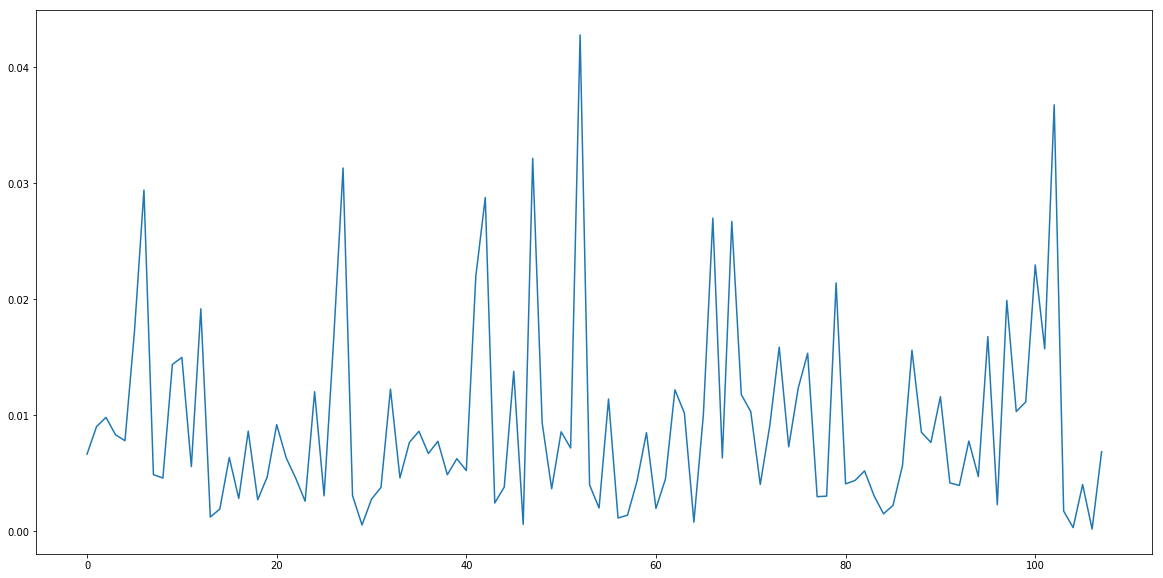

In [27]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.plot(model.feature_importances_)
plt.xticks(np.arange(X.shape[1]), X.columns.tolist(), rotation = 90)

Baseline-0.2 of dataset without columns
Name: target, dtype: int64
- accuracy:  0.7843450479233227
- validation logloss: 0.6572293353830837


In [46]:
correlationDict=dict(train.corr()['target'])
sortedCorrelationDict=sorted(correlationDict.items(), key=lambda x: x[1], reverse=True)
correlatedFeatures=[]
for item in sortedCorrelationDict[1:]:
    if item[1]>0:
        correlatedFeatures.append(item[0])

    

In [47]:
correlatedFeatures

['v101',
 'v96',
 'v14',
 'v75',
 'v94',
 'v23',
 'v7',
 'v28',
 'v78',
 'v39',
 'v74',
 'v52',
 'v85',
 'v80',
 'v36',
 'v42',
 'v61',
 'v72',
 'v24',
 'v84',
 'v49',
 'v63',
 'v99',
 'v22',
 'v102',
 'v98',
 'v54',
 'v46',
 'v41',
 'v9',
 'v40',
 'v37',
 'v1',
 'v17',
 'v5',
 'v51',
 'v71',
 'v68',
 'v91',
 'v100',
 'v13',
 'v2',
 'v25',
 'v70',
 'v90',
 'v76',
 'v83',
 'v29',
 'v89',
 'v20',
 'v3',
 'v38',
 'v87',
 'v95',
 'v73',
 'v34',
 'v45',
 'v57',
 'v16',
 'v50',
 'v26',
 'v35',
 'v21',
 'v31',
 'v55',
 'v67',
 'v93',
 'v27',
 'v59',
 'v19',
 'v58',
 'v33',
 'v60',
 'v8',
 'v32',
 'v79',
 'v81',
 'v18',
 'v4',
 'v82',
 'v48',
 'v12',
 'v65',
 'v6',
 'v77',
 'v53',
 'v10']

In [96]:
np.random.seed(0)
train = pd.read_csv('trainData.csv', header=0) #61878 training data
validation = train.iloc[60000:]
train = train.iloc[:60000]
features = [f for f in list(train) if "v" in f]
X = train[features]
X+=1e-4
print(X)
Y = train['target']
x_prediction = validation[features]    
model_linear = xgb.XGBClassifier(max_depth=30, learning_rate=0.1, n_estimators=100)
model_ensemble = lgb.LGBMClassifier(max_depth=40)
print("# Training...")
model_linear.fit(X, Y)
model_ensemble.fit(X, Y)
print("# Predicting...")
y_prediction_ensemble = model_ensemble.predict_proba(x_prediction)
print("- probabilities_ensemble:", y_prediction_ensemble[:5])
y_prediction_linear = model_linear.predict_proba(x_prediction)
print("- probabilities_linear:", y_prediction_linear[:5])
print("- target:", validation['target'][:5])
y_prediction = [0.4*y+0.6*x if np.argmax(x)==np.argmax(y) else 0.2*y+0.8*x 
                for (x,y) in zip(y_prediction_linear, y_prediction_ensemble)]
correct = [
    x[y-1] == max(x) for (x, y) in zip(y_prediction, validation['target'] )
]
print("- accuracy: ", sum(correct) / float(validation.shape[0]))
print("- validation logloss:", logloss(validation['target'], y_prediction))
    

           v1     v10    v100    v101    v102    v103     v11     v12     v13  \
0      1.4001  0.0001  0.2001  1.0001  4.2001  0.4001  0.0001  0.0001  0.0001   
1      0.0001  0.0001  0.0001  2.8001  0.0001  0.8001  0.0001  0.2001  1.2001   
2      0.0001  0.0001  0.0001  0.4001  0.0001  0.6001  0.8001  0.0001  0.0001   
3      0.0001  0.0001  0.0001  0.0001  0.2001  0.8001  0.4001  0.0001  0.0001   
4      0.0001  0.0001  0.0001  0.0001  0.0001  0.0001  0.0001  0.0001  0.0001   
5      0.8001  0.0001  0.0001  0.0001  0.2001  0.2001  0.0001  0.0001  0.0001   
6      0.0001  0.0001  0.2001  0.2001  0.0001  0.2001  0.0001  0.4001  0.0001   
7      0.0001  0.0001  0.0001  0.0001  0.0001  0.0001  0.2001  0.0001  0.0001   
8      0.0001  0.2001  0.0001  0.0001  0.0001  0.2001  0.2001  0.0001  0.0001   
9      0.0001  0.0001  0.0001  0.0001  0.2001  0.0001  0.6001  0.0001  0.0001   
10     0.4001  0.2001  0.0001  0.0001  0.0001  0.0001  0.0001  0.0001  0.4001   
11     0.0001  0.0001  0.000

# Predicting...
- probabilities_ensemble: [[1.02666620e-04 6.09978379e-04 8.95606913e-05 1.83409342e-04
  9.98107553e-01 1.39057872e-04 3.60548330e-04 1.90258544e-04
  2.16966728e-04]
 [1.83380925e-04 9.66464749e-04 2.31909601e-04 6.41225815e-04
  9.96367880e-01 3.52206319e-04 1.97338412e-04 5.43722545e-04
  5.15871357e-04]
 [1.36331996e-02 5.02567096e-03 1.92206494e-03 8.60952755e-04
  1.11352062e-04 3.95618387e-03 5.79830147e-02 9.14869080e-01
  1.63848127e-03]
 [2.68832469e-02 1.29404437e-01 1.03969586e-01 7.34221438e-02
  2.42670860e-03 5.03684146e-01 6.62724482e-02 6.30611901e-02
  3.08760940e-02]
 [9.39673772e-01 4.77426915e-04 4.56774231e-04 8.93050817e-05
  1.99159959e-05 1.00041523e-03 2.42893384e-04 1.66896307e-02
  4.13498661e-02]]
- probabilities_linear: [[3.4096673e-05 1.1124394e-04 4.7929178e-05 1.3870580e-04 9.9945408e-01
  3.4385273e-05 8.8960616e-05 4.5200144e-05 4.5401634e-05]
 [5.8091646e-05 4.1575203e-04 4.1236457e-05 1.0663067e-04 9.9908280e-01
  4.5137269e-05 8.51

No feature Engineering- Combination of XGBOOST and LIGHTGBM without no finetune

Name: target, dtype: int64
- accuracy:  0.8333333333333334
- validation logloss: 0.4611661454852386



In [90]:
y_prediction= y_prediction_linear
print("- probabilities_linear:", y_prediction_linear[:5])
print("- target:", validation['target'][:5])
correct = [
    x[y-1] == max(x) for (x, y) in zip(y_prediction, validation['target'] )
]

print("- accuracy: ", sum(correct) / float(validation.shape[0]))
y_prediction = [0.4*y+0.6*x if np.argmax(x)==np.argmax(y) else 0.2*y+0.8*x 
                for (x,y) in zip(y_prediction_linear, y_prediction_ensemble)]
print("- validation logloss:", logloss(validation['target'], y_prediction))

- probabilities_linear: [[3.4096673e-05 1.1124394e-04 4.7929178e-05 1.3870580e-04 9.9945408e-01
  3.4385273e-05 8.8960616e-05 4.5200144e-05 4.5401634e-05]
 [5.8091646e-05 4.1575203e-04 4.1236457e-05 1.0663067e-04 9.9908280e-01
  4.5137269e-05 8.5193729e-05 9.4726478e-05 7.0375143e-05]
 [4.5116651e-03 1.7786699e-03 1.7180546e-03 7.7605242e-04 4.1596833e-04
  6.2969569e-03 1.2639094e-02 9.7042793e-01 1.4356642e-03]
 [3.0592407e-04 1.2984641e-03 1.6107727e-03 4.8436678e-04 2.1285022e-04
  9.9380505e-01 9.6089701e-04 9.7756402e-04 3.4406449e-04]
 [9.6388429e-01 5.7382823e-04 5.6534825e-04 3.9467556e-04 2.7405348e-04
  2.3520675e-03 7.2115456e-04 4.7267256e-03 2.6507791e-02]]
- target: 60000    5
60001    5
60002    8
60003    6
60004    1
Name: target, dtype: int64
- accuracy:  0.8359957401490948
- validation logloss: 0.46116492350797156
[0.01587781 0.18682413 0.06928807 0.05443886 0.010778   0.01954008
 0.05048681 0.54820794 0.04455833]
[0.01185261 0.42446458 0.09729325 0.03999149 0.00288

 3.2794880e-04 1.0384133e-03 9.6903769e-03 2.6017151e-04]
[2.41779985e-04 2.87052433e-01 6.95560840e-01 1.05440836e-03
 2.03626988e-04 3.26808234e-03 5.14701828e-03 6.86770531e-03
 6.04105086e-04]
2
[0.000765   0.47699487 0.51317847 0.00063008 0.00138906 0.00220859
 0.00086333 0.00333253 0.00063804]
[4.21166801e-04 5.80322281e-01 3.90061742e-01 1.36418539e-03
 1.00307676e-03 8.43347119e-03 6.94043974e-03 1.02635922e-02
 1.19004487e-03]
3
1617
261
170
231
1477


In [97]:
model_ensemble = lgb.LGBMClassifier(max_depth=40)
model_ensemble.fit(X,Y)
y_prediction_ensemble = model_ensemble.predict_proba(x_prediction)

Use large max_bin (may be slower)
Use small learning_rate with large num_iterations
Use large num_leaves (may cause over-fitting)
Use bigger training data
Try dart

In [ ]:
#model = lgb.LGBMClassifier(num_leaves=100, max_depth=40, learning_rate=0.008, num_iterations=3000, n_estimators=140)##learning_rate=0.008, max_depth=7, num_iterations=3000, num_leaves=35
model_xgb=xgb.XGBClassifier(max_depth=9, learning_rate=0.09, n_estimators=400)
print("# Training...") 
model_xgb.fit(X, Y)
print("# Predicting...")
y_prediction_xgb = model_xgb.predict_proba(x_prediction) 
print("- probabilities:", y_prediction_xgb[:5])
print("- target:", validation['target'][:5])
correct = [
    x[y-1] == max(x) for (x, y) in zip(y_prediction_xgb, validation['target'])
]
print("- accuracy: ", sum(correct) / float(validation.shape[0]))
print("- validation logloss:", logloss(validation['target'], y_prediction_xgb))
 

# Training...


In [ ]:
model_lgb = lgb.LGBMClassifier(num_leaves=100, max_depth=40, learning_rate=0.008, num_iterations=3000, n_estimators=140)##learning_rate=0.008, max_depth=7, num_iterations=3000, num_leaves=35
print("# Training...") 
model_lgb.fit(X, Y)
print("# Predicting...")
y_prediction_lgb = model_lgb.predict_proba(x_prediction) 
print("- probabilities:", y_prediction_lgb[:5])
print("- target:", validation['target'][:5])
correct = [
    x[y-1] == max(x) for (x, y) in zip(y_prediction_lgb, validation['target'])
]
print("- accuracy: ", sum(correct) / float(validation.shape[0]))
print("- validation logloss:", logloss(validation['target'], y_prediction_lgb))

# Training...


/Users/nev/anaconda3/lib/python3.6/site-packages/lightgbm/engine.py:116: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


In [136]:
y_prediction = [0.29*y+0.71*x if np.argmax(x)==np.argmax(y) else 0.3*y+0.7*x 
                for (x,y) in zip(y_prediction_lgb, y_prediction_xgb)]

y_prediction = [x if abs(max(x)-max(y))>0.3 and np.argmax(x)==np.argmax(y) else z
                for (x,y,z) in zip(y_prediction_lgb, y_prediction_xgb, y_prediction)]
correct = [
    x[y-1] == max(x) for (x, y) in zip(y_prediction, validation['target'] )
]
print("- accuracy: ", sum(correct) / float(validation.shape[0]))
print("- validation logloss:", logloss(validation['target'], y_prediction_xgb))
    


- accuracy:  0.821618743343983
- validation logloss: 0.48947976763901857


# Name: target, dtype: int64
- accuracy:  0.7917997870074548
- validation logloss: 0.7586543688410393


([<matplotlib.axis.XTick at 0x10bdf8208>,
 <a list of 106 Text xticklabel objects>)

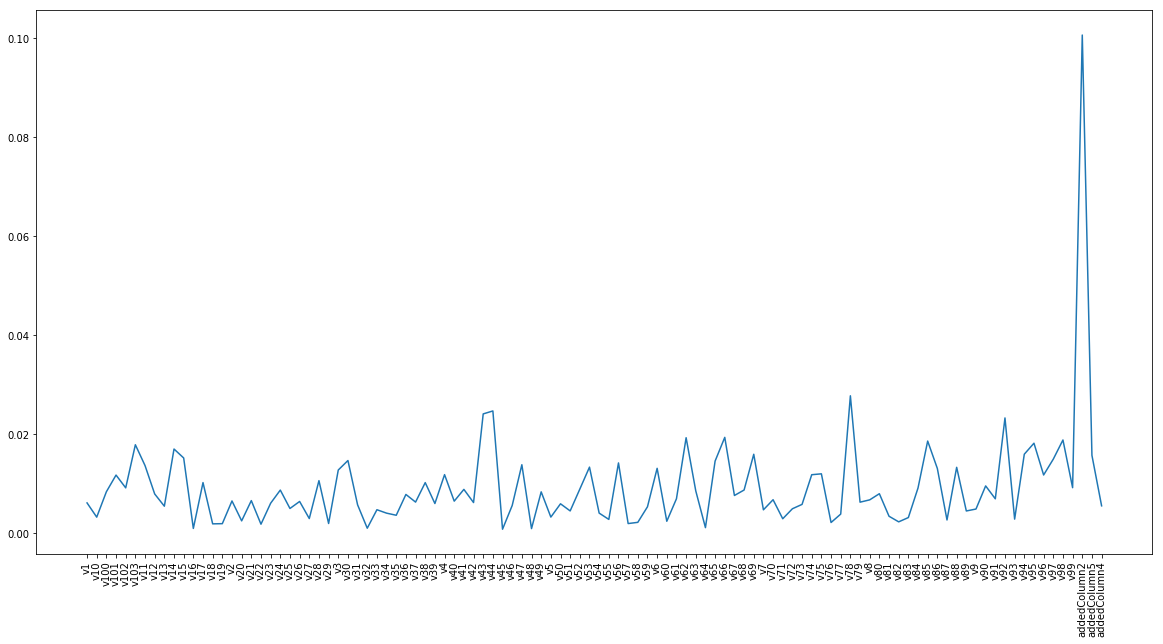

In [137]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.plot(model_xgb.feature_importances_)
plt.xticks(np.arange(X.shape[1]), X.columns.tolist(), rotation = 90)

([<matplotlib.axis.XTick at 0x10b94bba8>,
 <a list of 106 Text xticklabel objects>)

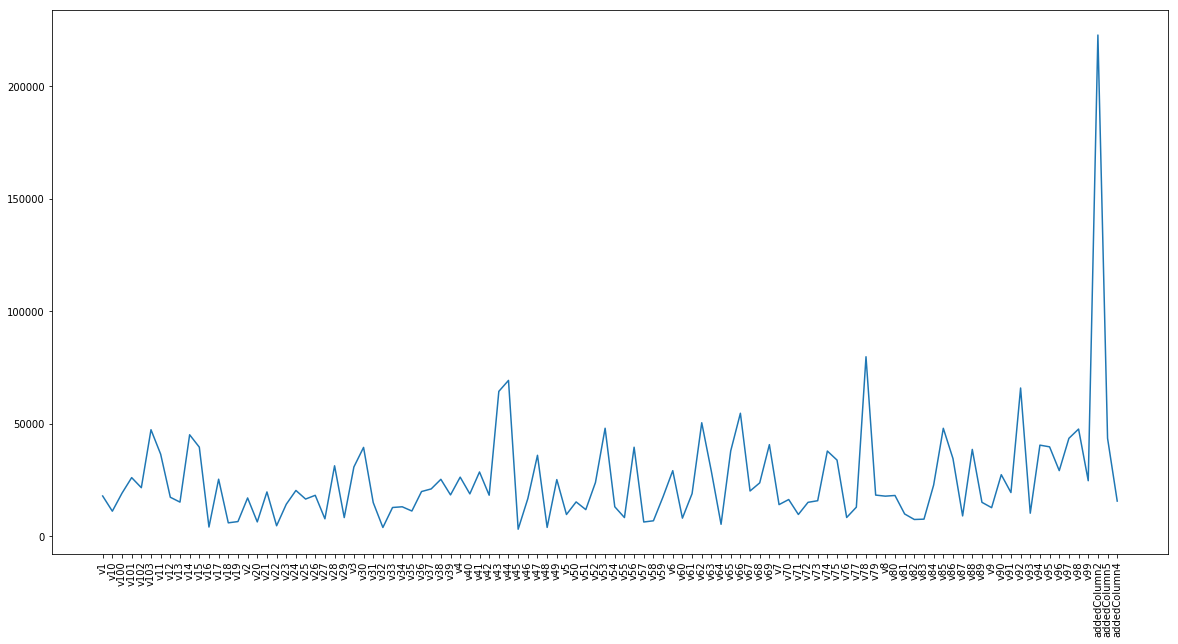

In [138]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.plot(model_lgb.feature_importances_)
plt.xticks(np.arange(X.shape[1]), X.columns.tolist(), rotation = 90)